# Import Library

In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import PIL
import pathlib
from keras_preprocessing.image import ImageDataGenerator

In [2]:
path = r"C:\Users\Asus\Downloads\Compressed\data"
data_dir = pathlib.Path(path)

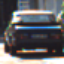

In [3]:
vehicle = list(data_dir.glob('vehicles/*'))
PIL.Image.open(str(vehicle[0]))

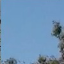

In [4]:
novehicle = list(data_dir.glob('non-vehicles/*'))
PIL.Image.open(str(novehicle[0]))

## Splitting Data

In [5]:
vehicle_dir = r"C:\Users\Asus\Downloads\Compressed\data\vehicles"
non_vehicle_dir = r"C:\Users\Asus\Downloads\Compressed\data\non-vehicles"

In [6]:
vehicle_dir_name = os.listdir(vehicle_dir)
non_vehicle_dir_name = os.listdir(non_vehicle_dir)

In [7]:
print('TOTAL NO. OF VEHICLE IMAGES:', len(vehicle_dir_name))
print('TOTAL NO. OF NON-VEHICLE IMAGES:', len(non_vehicle_dir_name))

TOTAL NO. OF VEHICLE IMAGES: 8792
TOTAL NO. OF NON-VEHICLE IMAGES: 8968


In [8]:
os.makedirs('./output')

In [9]:
dir = './output/'
train_dir = os.path.join(dir, 'train')
val_dir =os.path.join(dir, 'validation')
test_dir = os.path.join(dir, 'test')
vehicle_train_dir = os.path.join(train_dir, 'vehicles')
non_vehicle_train_dir = os.path.join(train_dir, 'non-vehicles')
vehicle_val_dir = os.path.join(val_dir, 'vehicles')
non_vehicle_val_dir = os.path.join(val_dir, 'non-vehicles')
vehicle_test_dir = os.path.join(test_dir, 'vehicles')
non_vehicle_test_dir = os.path.join(test_dir, 'non-vehicles')

In [10]:
train_size =0.7
test_size = 0.3

In [13]:
train_vehicles,xtrain_rem= train_test_split(
                        vehicle_dir_name, train_size=train_size, shuffle=True, random_state=1
                    )
valid_vehicles,test_vehicles = train_test_split(
                        xtrain_rem, test_size=test_size, shuffle=True, random_state=1
                    )
train_non_vehicles,ytrain_rem =train_test_split(
                        non_vehicle_dir_name, train_size=train_size, shuffle=True, random_state=1
                    )
valid_non_vehicles,test_non_vehicles = train_test_split(
                        ytrain_rem, test_size=test_size, shuffle=True, random_state=1
                    )

In [14]:
print('TOTAL NO. OF TRAIN VEHICLE IMAGES:', len(train_vehicles))
print('TOTAL NO. OF TRAIN NON-VEHICLE IMAGES:', len(train_non_vehicles))

print('TOTAL NO. OF VALIDATION VEHICLE IMAGES:', len(valid_vehicles))
print('TOTAL NO. OF VALIDATION NON-VEHICLE IMAGES:', len(valid_non_vehicles))

print('TOTAL NO. OF TEST VEHICLE IMAGES:', len(test_vehicles))
print('TOTAL NO. OF TEST NON-VEHICLE IMAGES:', len(test_non_vehicles))

TOTAL NO. OF TRAIN VEHICLE IMAGES: 6154
TOTAL NO. OF TRAIN NON-VEHICLE IMAGES: 6277
TOTAL NO. OF VALIDATION VEHICLE IMAGES: 1846
TOTAL NO. OF VALIDATION NON-VEHICLE IMAGES: 1883
TOTAL NO. OF TEST VEHICLE IMAGES: 792
TOTAL NO. OF TEST NON-VEHICLE IMAGES: 808


In [15]:
def move_images(image_list, old_dir_path, new_dir_path):
    if not os.path.exists(new_dir_path):
        os.makedirs(new_dir_path)
    
    for file_name in image_list:
        shutil.copy(
            os.path.join(old_dir_path, file_name),
            os.path.join(new_dir_path, file_name)
        )
    print(f'{len(image_list)} IMAGES COPIED TO {new_dir_path}')

In [16]:
move_images(train_vehicles, vehicle_dir, vehicle_train_dir)
move_images(train_non_vehicles, non_vehicle_dir, non_vehicle_train_dir)

move_images(valid_vehicles, vehicle_dir, vehicle_val_dir)
move_images(valid_non_vehicles, non_vehicle_dir, non_vehicle_val_dir)

move_images(test_vehicles, vehicle_dir, vehicle_test_dir)
move_images(test_non_vehicles, non_vehicle_dir, non_vehicle_test_dir)

6154 IMAGES COPIED TO ./output/train\vehicles
6277 IMAGES COPIED TO ./output/train\non-vehicles
1846 IMAGES COPIED TO ./output/validation\vehicles
1883 IMAGES COPIED TO ./output/validation\non-vehicles
792 IMAGES COPIED TO ./output/test\vehicles
808 IMAGES COPIED TO ./output/test\non-vehicles
